nearly ideal Triangle, wrong part of segment is choosen:
[Ideal(0.993, 0.119), Ideal(1.0, 0.019), Point(0.856, -0.508)]
[Ideal(0.998, -0.069), Ideal(0.731, -0.682), Point(0.082, -0.913)]
[Ideal(0.852, 0.524), Ideal(0.995, -0.099), Point(0.77, 0.618)]

intersection with cap didn't work...
[Ideal(0.525, 0.851), Ideal(0.513, -0.859), Point(0.269, 0.616)]

Tri is CCW
Tri is delta-slim for delta = 0.6561823883645843
[Point(-0.11, -0.667), Point(-0.646, -0.715), Point(-0.238, -0.963)]
2


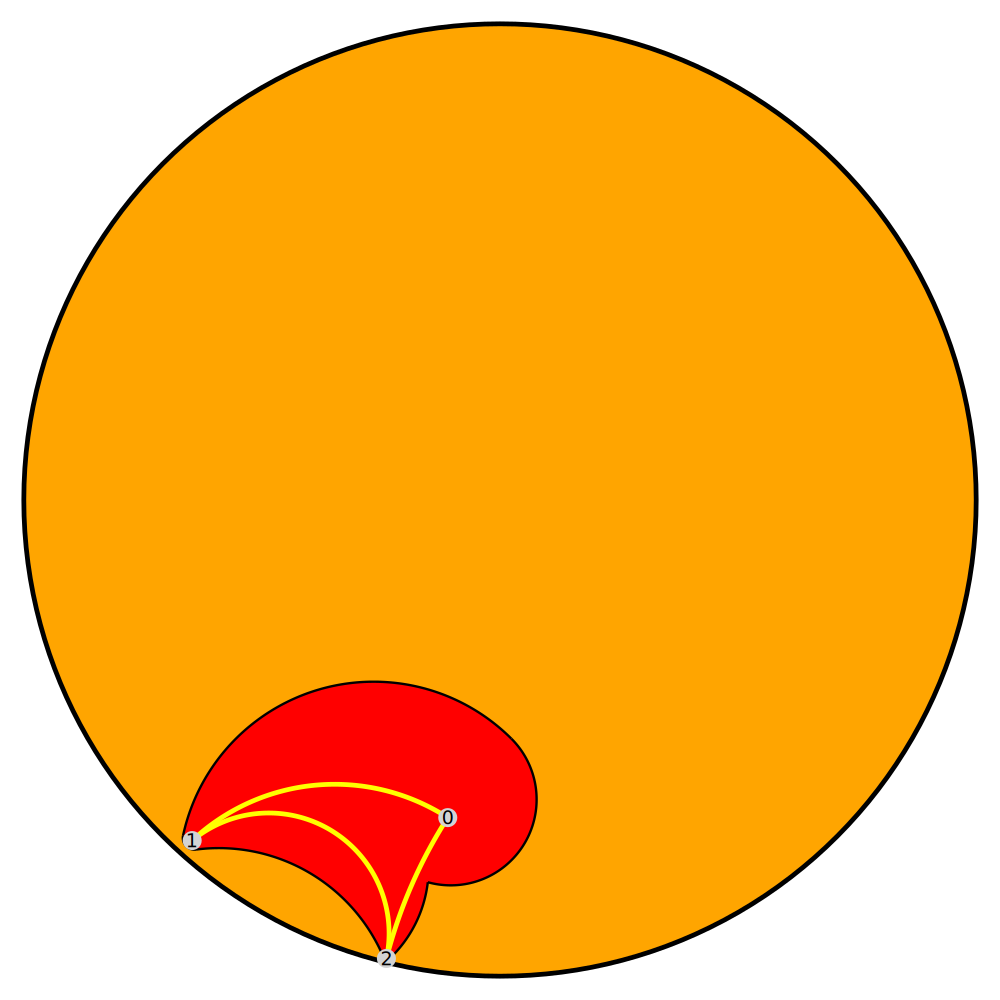

In [280]:
import random
import drawSvg as draw
from constructions import *
from deltaNeigbourhood import *
from hyperbolic.poincare.shapes import *
from Triangle import *

d = draw.Drawing(2.1, 2.1, origin='center')
d.setRenderSize(1000)
d.append(draw.Circle(0, 0, 1, fill='orange',stroke_width=0.01, stroke='black'))



p1=Point.fromEuclid(-0.104, 0.069)
p2=Point.fromEuclid(-0.182, 0.212)
p3=Point.fromEuclid(-0.622, -0.316)

PList=[p1,p2, p3]
PList=randomPoints(3)
#PList=[Ideal.fromDegree(i/3*360) for i in range(2)]

#PList=[Point(0.992, 0.118), Point(1.0, 0), Point(0.856, -0.508)]

numOfIdealPts=0
PList=[Ideal(p.theta)if i<numOfIdealPts else p for i,p in enumerate(PList)]



Tri=Triangle.fromVertices(PList)


delta = Tri.approx()
#delta=0.3

k=random.randint(0,2)
#d.draw(Tri, stroke='none',  fill='lightblue')
#d.draw(Tri.offsetPolygon(delta), fill='black')
d.draw(deltaNbh(Tri,delta,k), fill='red')

for l in deltaNbh(Tri,delta,k).edges:
    d.draw(l, stroke_width=0.005, stroke='black', fill='none')

for i,l in enumerate(Tri.edges):
    #outer=Tri.offsetEdge(i,delta, inner=False).trimmed(*Tri.offsetVertice(i,i,delta,inner=False), *Tri.offsetVertice(i+1,i,delta,inner=False))
    #d.draw(outer, fill='none', stroke='lightblue', stroke_width=0.005)
    #inner=Tri.offsetEdge(i,delta).trimmed(*Tri.offsetVertice(i,i,delta, inner=True), *Tri.offsetVertice(i+1,i,delta, inner=True))
    #d.draw(inner, fill='none', stroke='lightyellow', stroke_width=0.005)
    #d.draw(Tri.offsetEdge(i,delta, inner=True), hwidth=0.01, fill='darkorange')
    #d.draw(Tri.offsetEdge(i,delta, inner=False), hwidth=0.01, fill='blue')
    #d.draw(Hypercycle.fromHypercycleOffset(l,delta), hwidth=0.03,fill='yellow')
    d.draw(l, fill='none', stroke='yellow', stroke_width=0.01)





for i,v in enumerate(Tri.vertices):
    d.draw(v, radius=0.02, fill='lightgray')
    d.draw(draw.Text(str(i), 0.04, *v, center=0.7))
    #d.draw(Tri.endCap(i,i-1,delta), fill='none', stroke='lightblue', stroke_width=0.005)
    #d.draw(Tri.offsetVertice(i,i,delta,onEdge=True), radius=0.01, fill='orange')



#d.draw(Tri, fill='white')
#d.draw(deltaNbh(Tri,delta,0), stroke='none', fill='red')


if Tri.isCCW():
    print('Tri is CCW')
else:
    print('Tri is CW')

if Tri.isCovered(delta):
    print('Tri is delta-slim for delta =',delta)
else:
    print('Tri is not covered for delta =',delta)

print(PList)
print(k)
#print(delta)
#print(np.log(1+2**0.5))

d